<font size="5"><b><center>TEXT CLASSIFICATION</center></b></font>
<font size="2"><b><center>ASSIGNMENT-7</center></b></font>

<font size="3"><b>DATASET DESCRIPTION</center></b></font>

<font size="2"><b>OVERVIEW</center></b></font>
The SMS Spam Collection dataset contains SMS messages labeled as either "ham" (not spam) or "spam." The dataset is commonly used for text classification tasks, particularly for identifying spam messages. Here's a brief overview of the dataset:

<font size="2"><b>COLUMNS</center></b></font>
1. **v1**: Label indicating whether the SMS message is "ham" (not spam) or "spam."
2. **v2**: The text content of the SMS message.
3. **Unnamed: 2, Unnamed: 3, Unnamed: 4**: Extra columns with NaN (missing) values, likely due to formatting issues in the original dataset.cleaned.head()


<font size="3"><b>LOADING DATA SET</b></font>

In [43]:
# Loading data set using pandas.
!pip install pandas

import pandas as pd

file= "C:/Users/aleky/Desktop/TextBasedAnalysis/spam1.csv"
df = pd.read_csv('C:/Users/aleky/Desktop/TextBasedAnalysis/spam1.csv', encoding='latin-1')
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<font size="3"><b>PLOTTING v1 FIELD</b></font>

<Axes: xlabel='v1'>

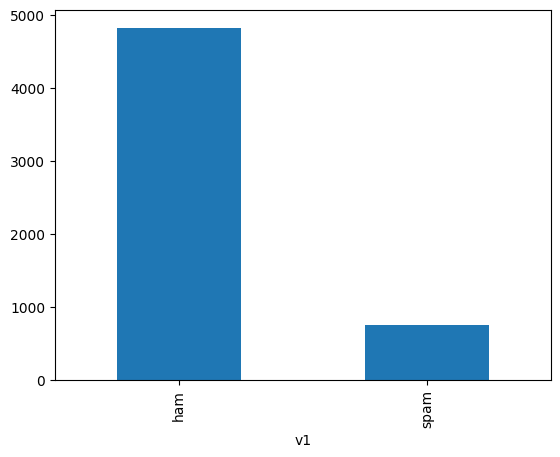

In [44]:
df['v1'].value_counts().sort_index().plot(kind='bar')

<font size="3"><B>TEXT CLASIFICATION<b></b></font>

In [ ]:
using above data set 
1.remove duplicates
2. drop null values
3.plot the graphs
4.function to rmove odd words
5.data cleaning
6.train-test split
7.training the model:convert x train to numbers, build a model
8.Testing the model: accuracty of the model,run the dammy,Cofusion matrix, Plotting Confussion matrix
9.CLSSIFICATION REPORT
10.DOWNSAMPLING


<font size="3"><b>FUNCTION TO REMOVE ODD WORDS</b></font>

In [45]:
import html
import re

def clean(text):
    # Convert HTML escapes like & to characters.
    text = html.unescape(text) 
    # Remove HTML tags.
    text = re.sub(r'<[^<>]*>', ' ', text)
    # Remove Markdown URLs like [Some text](https://....).
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # Remove text or code in brackets like [0].
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # Remove standalone sequences of specials.
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # Remove standalone sequences of hyphens like --- or ==.
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove sequences of white spaces.
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Example usage:
input_text = "<p>Hello <b>world</b>!</p> [Link](https://example.com) [0] --- === \n\nExtra    spaces  here."
output_text = clean(input_text)
print(output_text)


Hello world ! Link Extra spaces here.


<font size="3"><b>STEP1:DATA CLEANING</b></font>

In [46]:
import html
import re

def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


def remove_odd_words(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
    
df['v2'] = df['v2'].apply(remove_odd_words)

# Displaying a random sample of 2 rows
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5119,ham,Lol for real She told my dad I have cancer,NaN,NaN,NaN
2937,ham,Hey ive booked the pilates and yoga lesson alr...,NaN,NaN,NaN


<font size="3"><b>STEP2-TRAIN-TEST SPLIT</b></font>

In [47]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the dataset
X = df['v2']  # Features
y = df['v1']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting sets
print("Size of Training Features:", X_train.shape)
print("Size of Testing Features:", X_test.shape)
print("Size of Training Labels:", y_train.shape)
print("Size of Testing Labels:", y_test.shape)

Size of Training Features: (4457,)
Size of Testing Features: (1115,)
Size of Training Labels: (4457,)
Size of Testing Labels: (1115,)


<font size="3"><b>STEP3: TRAINING THE MODEL</b></font>

<font size="3"><b>CONVERT X_TRAIN TO NUMBERS</b></font>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


# Initializing a TfidfVectorizer object with specified parameters
tfidf = TfidfVectorizer(max_df=10, ngram_range=(1, 2), stop_words="english")

# Transforming the training data (X_train) into a TF-IDF representation
X_train_tf = tfidf.fit_transform(X_train)

# Transforming the test data (X_test) into a TF-IDF representation using the same vocabulary as the training data
X_test_tf = tfidf.transform(X_test)

print("Shape of TF-IDF matrix for training data:", X_train_tf.shape)
print("Shape of TF-IDF matrix for test data:", X_test_tf.shape)


Shape of TF-IDF matrix for training data: (4457, 29378)
Shape of TF-IDF matrix for test data: (1115, 29378)


<font size="3"><b>BUILDING A MODEL</b></font>

In [49]:
# Importing the LinearSVC class from the sklearn.svm module
from sklearn.svm import LinearSVC

# Initializing a LinearSVC model object with specified parameters
# random_state=0 ensures reproducibility of results
# tol=1e-5 specifies the tolerance for stopping criteria
model1 = LinearSVC(random_state=0, tol=1e-5, dual=True)

# Training the LinearSVC model on the TF-IDF transformed training data and corresponding target labels
model1.fit(X_train_tf, y_train)

LinearSVC(dual=True, random_state=0, tol=1e-05)

<font size="3"><b>STEP4: TESTING THE MODEL</b></font>

<font size="3"><b>ACCURACY OF THE MODEL</b></font>

In [51]:
# Importing the accuracy_score function from sklearn.metrics module
from sklearn.metrics import accuracy_score

# Making predictions on the test data using the trained model
Y_pred = model1.predict(X_test_tf)

# Calculating the accuracy score by comparing the predicted labels (Y_pred) with the actual labels (Y_test)
accuracy = accuracy_score(y_test, Y_pred)

# Printing the accuracy score
print('Accuracy Score -', accuracy)

Accuracy Score - 0.968609865470852


<font size="3"><b>RUN THE DUMMY</b></font>

In [52]:
# Importing the DummyClassifier class from sklearn.dummy module
from sklearn.dummy import DummyClassifier

# Creating a DummyClassifier object with 'most_frequent' strategy
# 'most_frequent' strategy always predicts the most frequent class in the training data
# random_state=42 ensures reproducibility of results
clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Training the DummyClassifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data using the trained DummyClassifier
Y_pred_baseline = clf.predict(X_test)

# Calculating the accuracy score by comparing the predicted labels (Y_pred_baseline) with the actual labels (Y_test)
baseline_accuracy = accuracy_score(y_test, Y_pred_baseline)

# Printing the accuracy score
print('Accuracy Score -', baseline_accuracy)

Accuracy Score - 0.8654708520179372


<font size="3"><b>CONFUSION MATRIX</b></font>

In [53]:
# Importing the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Making predictions on the test data using the trained model
Y_pred = model1.predict(X_test_tf)

# Calculating the confusion matrix by comparing the predicted labels (Y_pred) with the actual labels (Y_test)
# The confusion matrix provides a summary of predictions made by the model
# Rows correspond to actual classes, while columns correspond to predicted classes
# Each cell (i, j) in the matrix represents the number of instances of class i predicted as class j
# The diagonal elements (top-left to bottom-right) represent correctly classified instances
# Off-diagonal elements represent misclassifications
conf_matrix = confusion_matrix(y_test, Y_pred)

# Printing the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[965   0]
 [ 35 115]]


<font size="3"><b>PLOTTING CONFUSION MATRIX</b></font>

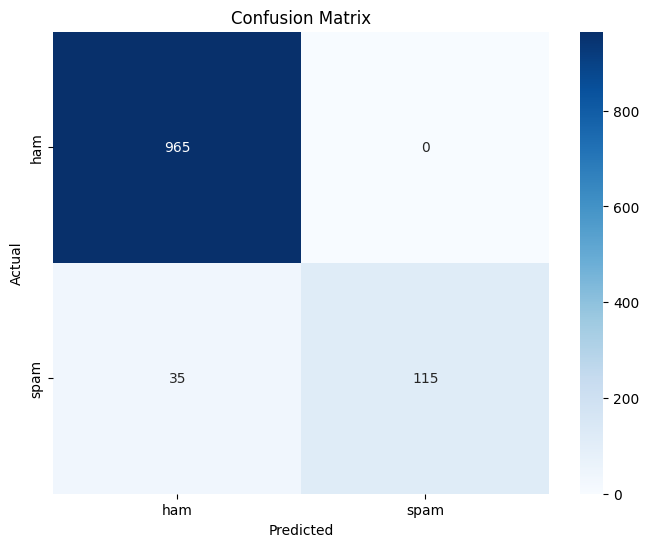

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Creating a ConfusionMatrixDisplay object with the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<font size="3"><b>CLASIFICATION REPORT</b></font>

In [59]:
from sklearn.metrics import classification_report

# Print classification report with zero_division='warn'
print("Classification Report:\n", classification_report(y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



<font size="3"><b>DOWNSAMPLING</b></font>

In [61]:
import pandas as pd

# Downsampling
df_downsampled = pd.concat([df[df['v1'] == 'ham'].sample(n=len(df[df['v1'] == 'spam']), random_state=42), df[df['v1'] == 'spam']])

# Output
print(df_downsampled)

        v1                                                 v2 Unnamed: 2  \
3714   ham  I am lateso call you tomorrow morningtake care...        NaN   
1311   ham  U r too much close to my heart If u go away i ...        NaN   
548    ham                                    Wait  ltgt  min        NaN   
1324   ham  Can you call me plz Your number shows out of c...        NaN   
3184   ham  MAYBE IF YOU WOKE UP BEFORE FUCKING  THIS WOUL...        NaN   
...    ...                                                ...        ...   
5537  spam  Want explicit SEX in  secs Ring  now Costs pmi...        NaN   
5540  spam  ASKED MOBILE IF  CHATLINES INCLU IN FREE MINS ...        NaN   
5547  spam  Had your contract mobile  Mnths Latest Motorol...        NaN   
5566  spam  REMINDER FROM O To get  pounds free call credi...        NaN   
5567  spam  This is the nd time we have tried  contact u U...        NaN   

     Unnamed: 3 Unnamed: 4  
3714        NaN        NaN  
1311        NaN        NaN  


Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.65      0.79       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
 [[965   0]
 [ 53  97]]


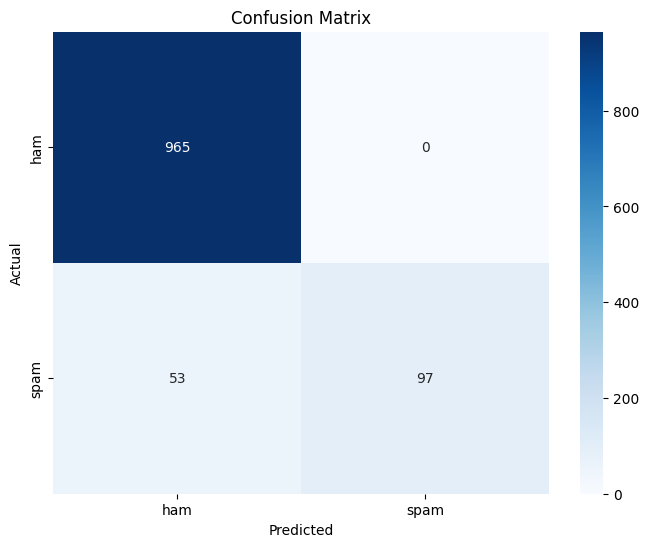

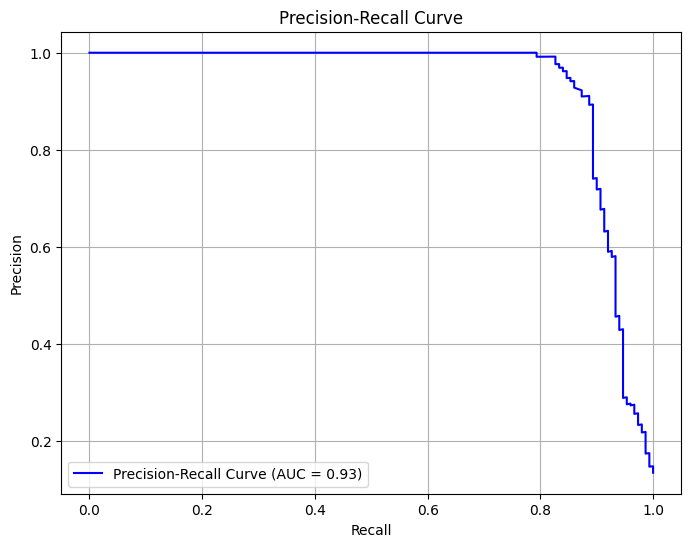

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Creating a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Convert labels to binary format
y_test_binary = (y_test == 'spam').astype(int)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_binary, pipeline.predict_proba(X_test)[:, 1])

# Calculate Area Under Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
